# 第一章　離散化の考え方

## 離散化を知る

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
g = 9.8 # 重力加速度

v0 = 10 # 初速度
h0 = 0  # 初期高さ
dt = 0.3 # 時間刻み

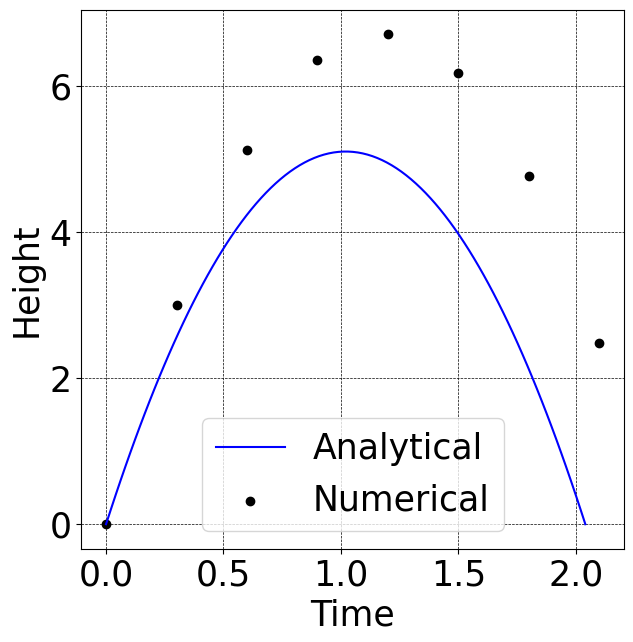

In [11]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 25 # グラフの文字サイズ

# 解析解(Analytical Solution)
t = np.linspace(0, 2 * v0 / g, 100)
h = - 0.5 * g * t ** 2 + v0 * t + h0  # 式(1.1)
la, = plt.plot(t, h, color='blue')

# 数値解(Numerical Solution)
t = 0
h = h0
while h >= h0:
    ln = plt.scatter(t, h, marker='o', c='black')
    h += (-g * t + v0) * dt # 式(1.7)
    t += dt 

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend(handles=[la, ln], labels=['Analytical', 'Numerical'])
plt.show()

In [4]:
dt = 0.1 # 時間刻み

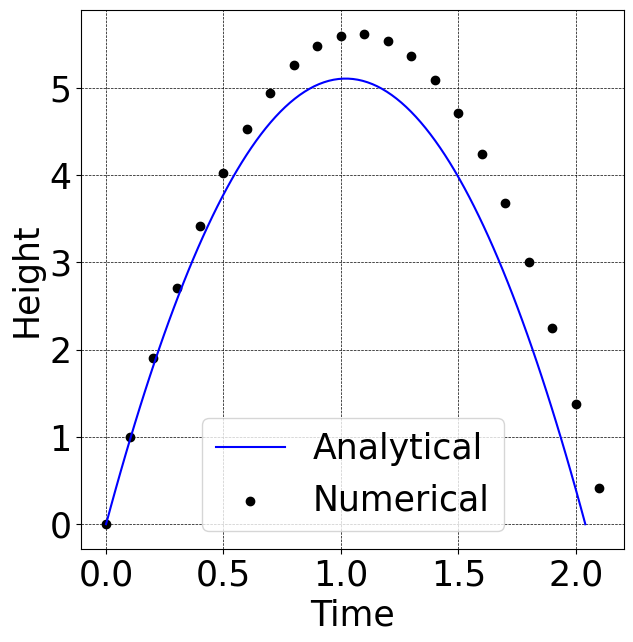

In [5]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 25 # グラフの文字サイズ

# 解析解(Analytical Solution)
t = np.linspace(0, 2 * v0 / g, 100)
h = - 0.5 * g * t ** 2 + v0 * t + h0  # 式(1.1)
la, = plt.plot(t, h, color='blue')

# 数値解(Numerical Solution)
t = 0
h = h0
while h >= h0:
    ln = plt.scatter(t, h, marker='o', c='black')
    h += (-g * t + v0) * dt # 式(1.7)
    t += dt 

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend(handles=[la, ln], labels=['Analytical', 'Numerical'])
plt.show()

In [6]:
dt = 0.02 # 時間刻み

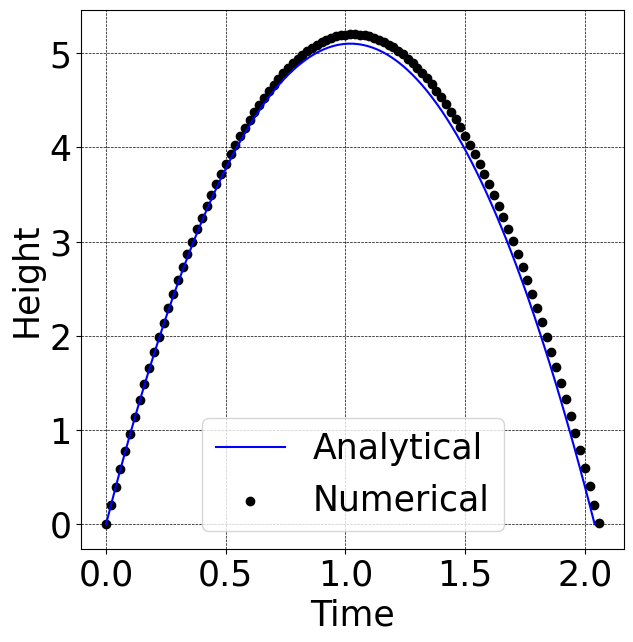

In [7]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 25 # グラフの文字サイズ

# 解析解(Analytical Solution)
t = np.linspace(0, 2 * v0 / g, 100)
h = - 0.5 * g * np.square(t) + v0 * t + h0  # 式(1.1)
la, = plt.plot(t, h, color='blue')

# 数値解(Numerical Solution)
t = 0
h = h0
while h >= h0:
    ln = plt.scatter(t, h, marker='o', c='black')
    h += (-g * t + v0) * dt # 式(1.7)
    t += dt 

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend(handles=[la, ln], labels=['Analytical', 'Numerical'])
plt.show()

In [8]:
dt = 0.1 # 時間刻み

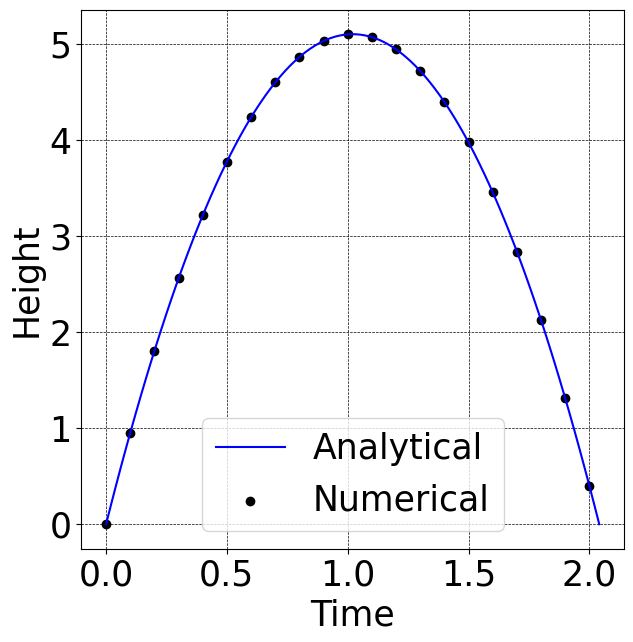

In [9]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 25 # グラフの文字サイズ

# 解析解(Analytical Solution)
t = np.linspace(0, 2 * v0 / g, 100)
h = - 0.5 * g * np.square(t) + v0 * t + h0  # 式(1.1)
la, = plt.plot(t, h, color='blue')

# 数値解(Numerical Solution)
t = 0
h = h0
while h >= h0:
    ln = plt.scatter(t, h, marker='o', c='black')
    h += (-g * (t + t + dt) * 0.5 + v0) * dt # 式(1.7)のtを(t1+t2)/2とした場合
    t += dt 

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend(handles=[la, ln], labels=['Analytical', 'Numerical'])
plt.show()

# 第二回

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 1
    else:
        q[j] = 0

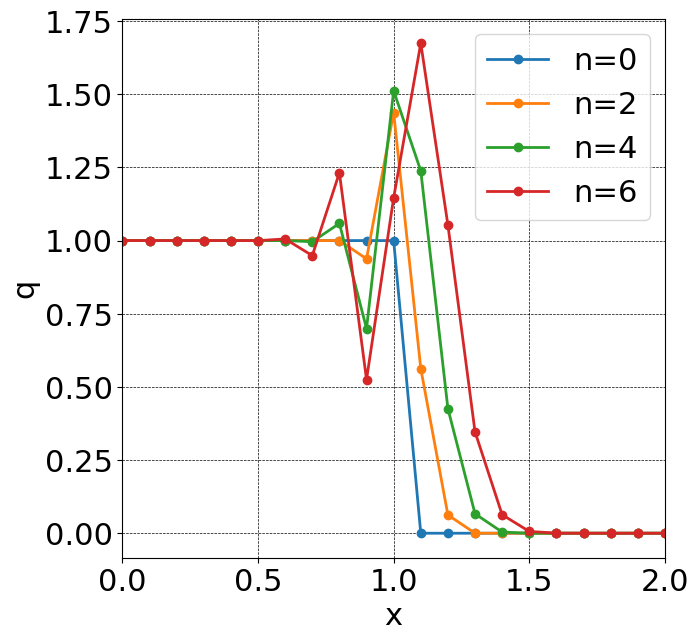

In [3]:
# FTCS

plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ

# 初期分布の可視化
plt.plot(x, q, marker='o', lw=2, label='n=0')

for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(1, jmax-1):
        q[j] = qold[j] - dt * c * (qold[j + 1] - qold[j - 1]) / (2 * dx)  # 式(2.7)

    # 各ステップの可視化
    if n % 2 == 0:
        plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlim([0, 2.0])
plt.xlabel('x')
plt.ylabel('q')
plt.legend()
plt.show()

In [4]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 1
    else:
        q[j] = 0

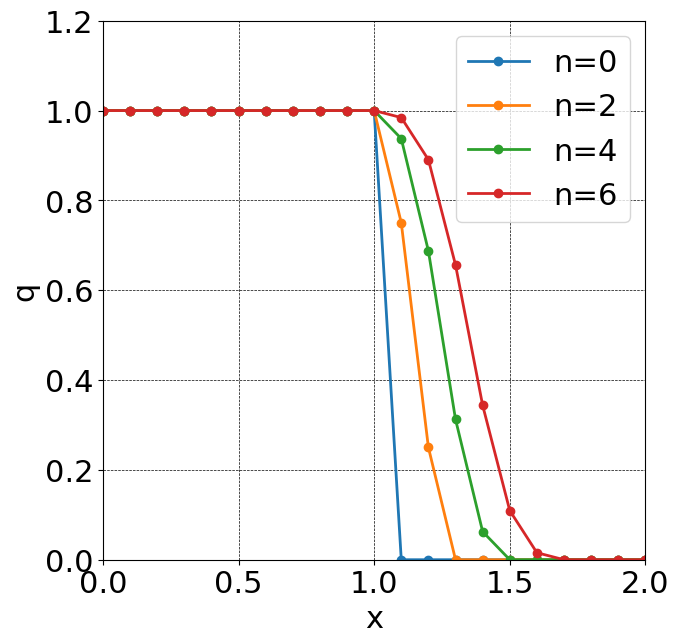

In [5]:
# 1次精度風上

plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ

# 初期分布の可視化
plt.plot(x, q, marker='o', lw=2, label='n=0')

for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(1, jmax-1):
        q[j] = qold[j] - dt * c * (qold[j] - qold[j - 1]) / dx  # 式(2.9)

    # 各ステップの可視化
    if n % 2 == 0:
        plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlim([0, 2.0])
plt.ylim([0, 1.2])
plt.xlabel('x')
plt.ylabel('q')
plt.legend()
plt.show()

In [6]:
c = 1
dt = 0.025
dx = 0.05 

jmax = 20 * 2 + 1
nmax = 6 * 2

In [7]:
x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 1
    else:
        q[j] = 0

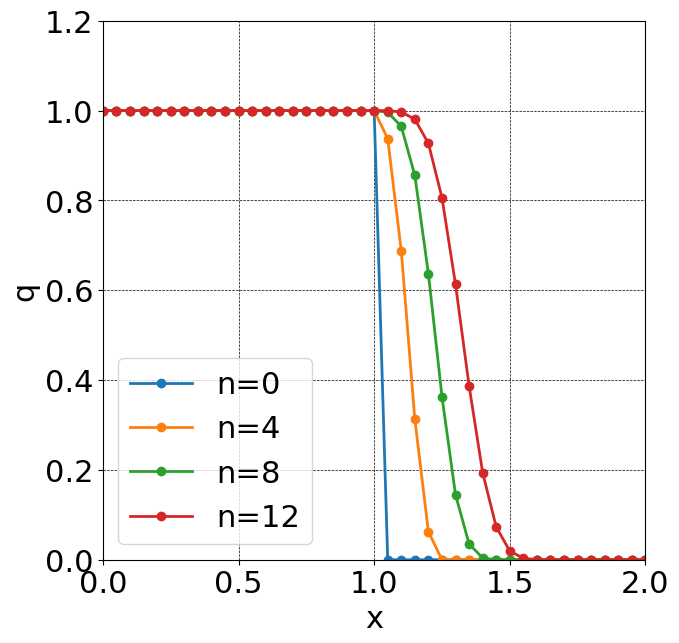

In [8]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ

# 初期分布の可視化
plt.plot(x, q, marker='o', lw=2, label='n=0')

for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(1, jmax-1):
        q[j] = qold[j] - dt * c * (qold[j] - qold[j - 1]) / dx  # 式(2.9)

    # 各ステップの可視化
    if n % (2 * 2) == 0:
        plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlim([0, 2.0])
plt.ylim([0, 1.2])
plt.xlabel('x')
plt.ylabel('q')
plt.legend()
plt.show()

In [9]:
c = 1
dt = 0.01
dx = 0.02

jmax = 20 * 5 + 1
nmax = 6 * 5

In [10]:
x = np.linspace(0, dx * (jmax - 1), jmax)

q = np.zeros(jmax)
for j in range(jmax):
    if (j < jmax / 2):
        q[j] = 1
    else:
        q[j] = 0

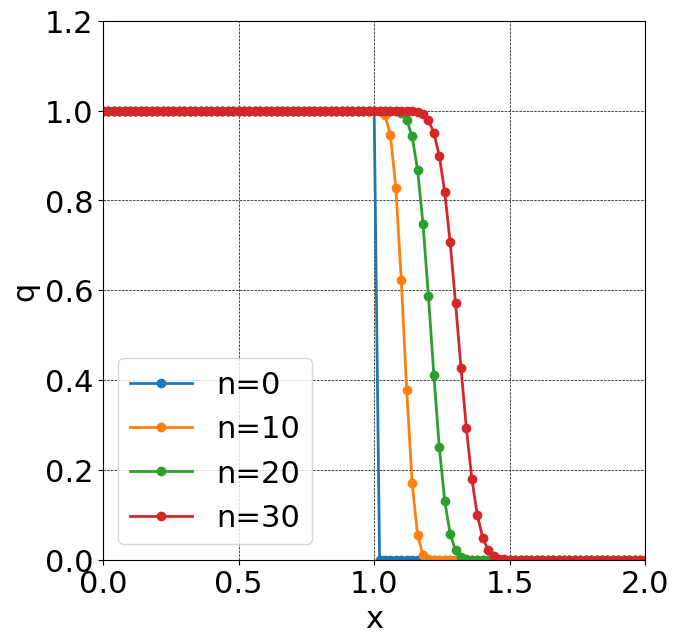

In [11]:
plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
plt.rcParams["font.size"] = 22 # グラフの文字サイズ

# 初期分布の可視化
plt.plot(x, q, marker='o', lw=2, label='n=0')

for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(1, jmax-1):
        q[j] = qold[j] - dt * c * (qold[j] - qold[j - 1]) / dx  # 式(2.9)

    # 各ステップの可視化
    if n % (2 * 5) == 0:
        plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

# グラフの後処理
plt.grid(color='black', linestyle='dashed', linewidth=0.5)
plt.xlim([0, 2.0])
plt.ylim([0, 1.2])
plt.xlabel('x')
plt.ylabel('q')
plt.legend()
plt.show()